# 1. Business Case :- heart_disease or not¶

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using
Machine Learning algorithms.

Task3:-Suggestions to the Hospital to awake the predictions of heart diseases
prevent life threats.

# 2. all requirement libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 3. Load My dataset

In [2]:
data = pd.read_csv("label_values.csv")

In [3]:
data

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# 4. Basic check

In [4]:
# check the rows and columns in dataset
data.shape

(180, 15)

In [5]:
# Display the unique column
data.nunique()

heart_disease_present                     2
patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
dtype: int64

In [6]:
# Display the first 5 rows
data.head()

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [7]:
# Display the last 5 rows
data.tail()

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,1,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,0,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [8]:
# column of data
data.columns

Index(['heart_disease_present', 'patient_id',
       'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [9]:
# data types of the column:-
data.dtypes

heart_disease_present                     int64
patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [10]:
# information of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   heart_disease_present                 180 non-null    int64  
 1   patient_id                            180 non-null    object 
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [11]:
num_cols = data.select_dtypes(include = "int")
for i in num_cols:
    print(i)
    print(data[i].unique())
    print(data[i].value_counts())
    print("---------------------------------------------------------------------------------")

heart_disease_present
[0 1]
heart_disease_present
0    100
1     80
Name: count, dtype: int64
---------------------------------------------------------------------------------
slope_of_peak_exercise_st_segment
[1 2 3]
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
---------------------------------------------------------------------------------
resting_blood_pressure
[128 110 125 152 178 130 150 170 120 140 138 144 136 160 108 106 156 180
 112 122 124 135 105 115 126 172 145 118 134 100 155 132 102  94 117 142]
resting_blood_pressure
130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
124     5
108     5
118     4
145     4
135     4
138     3
180     3
132     3
126     2
115     2
178     2
142     2
100     2
152     2
136     2
134     2
102     1
94      1
155     1
117     1
170     1
172     1
122     1
156     1
106     1
144     1
105     1
Name: count, dtype: int64
-------------------------------------

In [12]:
# statistical summary of numerical column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_disease_present,180.0,0.444444,0.498290,0.0,0.00,0.0,1.00,1.0
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


In [13]:
data.describe(include = "O")

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


# insights:-
1. Heart Disease Presence
The mean value for heart_disease_present is 0.444, indicating that about 44.4% of the patients in the dataset have heart disease, while the rest (55.6%) do not.
2. Exercise ST Segment Slope
The average slope (slope_of_peak_exercise_st_segment) is 1.55, suggesting that most patients have either an upsloping (1) or a flat (2) ST segment during exercise. Very few have a downsloping (3) segment.
3. Resting Blood Pressure
The mean resting blood pressure is 131.3 mmHg, with a minimum of 94 mmHg and a maximum of 180 mmHg.
This range suggests a mix of patients with normal blood pressure (<120) and those with hypertension (>140).
4. Chest Pain Type
The mean chest pain type is 3.15, indicating that most patients experience non-anginal pain (type 3) or are asymptomatic (type 4).
5. Major Blood Vessels
The average number of major blood vessels visible via fluoroscopy is 0.69, meaning most patients have 0–1 major vessels affected. The maximum value is 4.
6. Fasting Blood Sugar
Only 16.1% of patients have fasting blood sugar greater than 120 mg/dl, as the mean value is 0.16.
7. Resting ECG Results
The mean for resting_ekg_results is close to 1.05, suggesting that many patients have ST-T wave abnormalities (1), but some may have normal results (0).
8. Serum Cholesterol
The mean cholesterol level is 249.2 mg/dl, with a wide range (minimum 126 mg/dl, maximum 564 mg/dl).
A mean of 249.2 mg/dl is on the higher side, as levels above 240 mg/dl indicate high cholesterol, a key risk factor for heart disease.
9. ST Depression (Oldpeak)
The mean oldpeak_eq_st_depression is 1.01, with a maximum of 6.2, indicating varying degrees of stress-induced depression in the ST segment, which is a key indicator of heart stress.
10. Gender
The mean for sex is 0.688, meaning about 69% of the patients are male, and the rest are female.
11. Age
The average age of the patients is 54.8 years, with the youngest being 29 and the oldest 77.
This dataset likely focuses on middle-aged and older individuals, who are at higher risk for heart diseases.
12. Maximum Heart Rate Achieved
The mean heart rate achieved during exercise is 149.4 bpm, with a range from 96 bpm to 202 bpm.
A lower maximum heart rate in some patients could indicate limited exercise capacity, possibly due to heart conditions.
13. Exercise-Induced Angina
The mean value for exercise_induced_angina is 0.316, suggesting that about 31.6% of the patients experienced angina (chest pain) during exercise.


# 5. Domain Analysis:-

1. heart_disease_present
 * Description: Indicates the presence of heart disease (target variable).
* Values:
  * 0: No heart disease
  * 1: Heart disease present.

2. patient_id
* Description: Unique identifier for each patient.

3. slope_of_peak_exercise_st_segment
* Description: Slope of the ST segment during peak exercise (measured via ECG).
* Values:
  * 1: Upsloping (rising slope)
  * 2: Flat
  * 3: Downsloping (falling slope).

4. thal
* Description: Type of thalassemia or heart condition indicator.
* Values:
  * "normal"
  * "fixed_defect" (permanent defect)
  * "reversible_defect" (reparable defect).

5. resting_blood_pressure
* Description: Resting blood pressure in mmHg.

6. chest_pain_type
* Description: Type of chest pain experienced by the patient.
* Values:
    * 1: Typical angina (classic heart-related pain)
    * 2: Atypical angina (unusual chest pain)
    * 3: Non-anginal pain (not heart-related)
    * 4: Asymptomatic (no chest pain).

7. num_major_vessels
* Description: Number of major blood vessels colored using fluoroscopy.

8. fasting_blood_sugar_gt_120_mg_per_dl
* Description: Indicates if fasting blood sugar is greater than 120 mg/dl.
* Values:
    * 0: No
    * 1: Yes.

9. resting_ekg_results
* Description: Results of resting ECG (electrocardiogram).
* Values:
    * 0: Normal
    * 1: ST-T wave abnormality
    * 2: Left ventricular hypertrophy (thickening of the heart's left ventricle).

10. serum_cholesterol_mg_per_dl
* Description: Serum cholesterol level in mg/dl.

11. oldpeak_eq_st_depression
* Description: ST depression value, representing the difference in ST segment between rest and exercise.

12. sex
* Description: Patient's gender.
* Values:
    * 0: Female
    * 1: Male.

13. age
* Description: Age of the patient in years.

14. max_heart_rate_achieved
* Description: Maximum heart rate achieved during exercise.

15. exercise_induced_angina
* Description: Indicates if the patient experienced angina (chest pain) during exercise.
* Values:
    * 0: No
    * 1: Yes.


# 6. Exploratory Data Analysis:-

In [14]:
# Univariate Analysis

In [15]:
countplot=data[['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina']]

In [16]:
countplot.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type',
       'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl',
       'resting_ekg_results', 'sex', 'exercise_induced_angina'],
      dtype='object')

<Axes: xlabel='heart_disease_present', ylabel='count'>

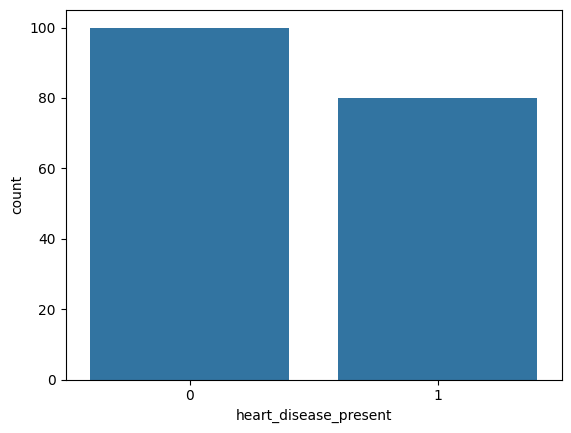

In [17]:
sns.countplot(x="heart_disease_present" , data=data)

In [18]:
# data is imbalnce

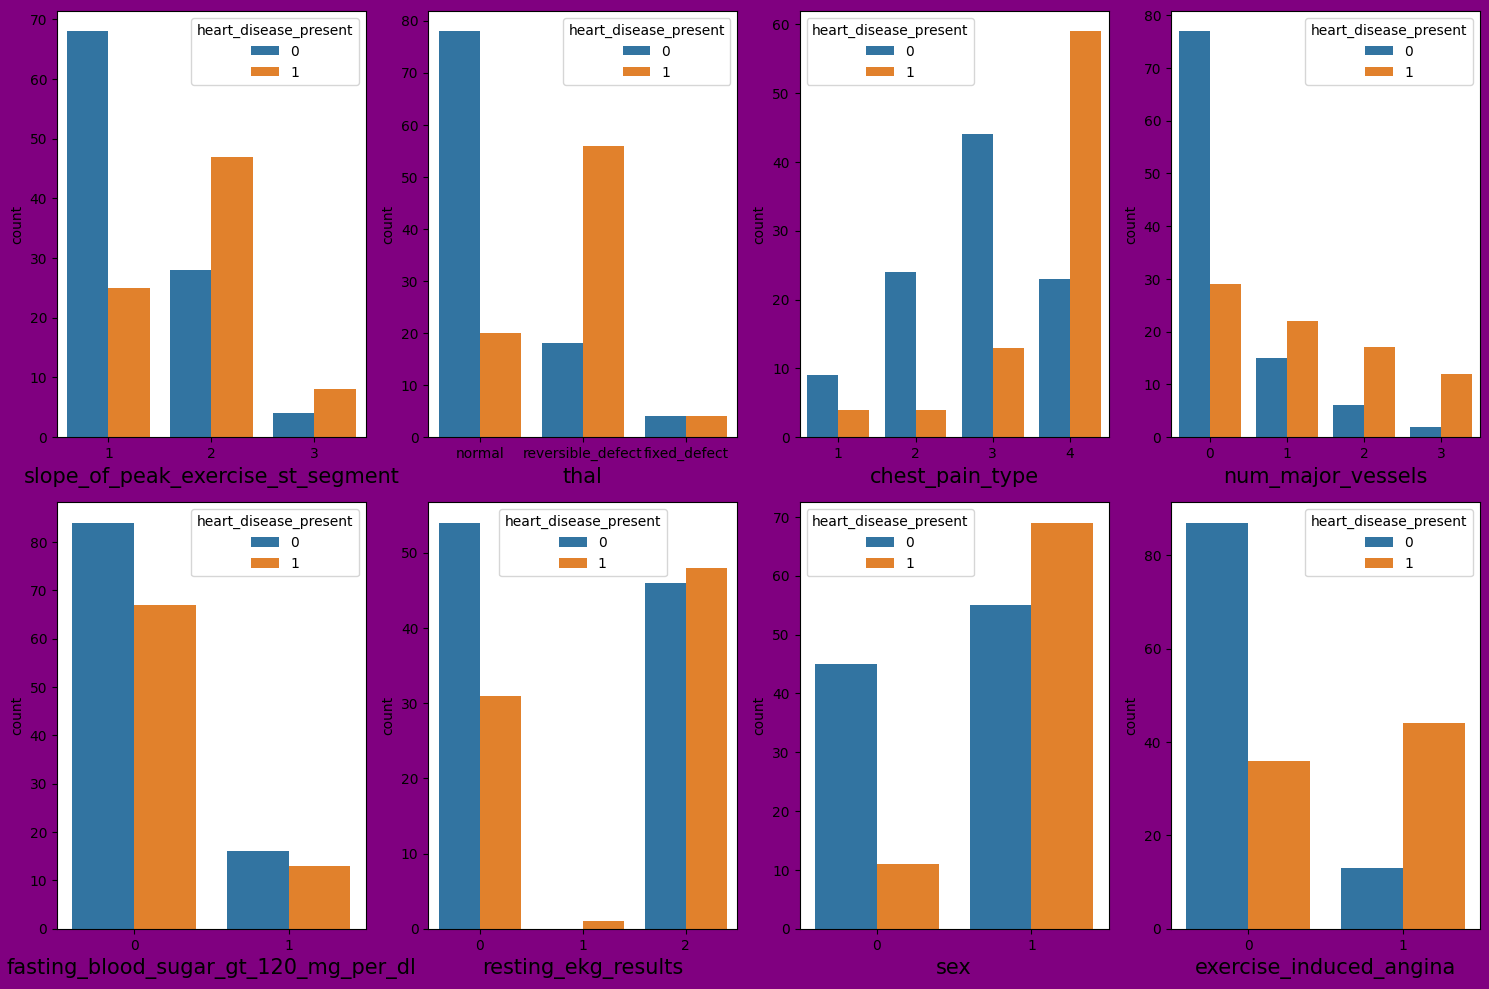

In [19]:
plt.figure(figsize = (15,10) , facecolor = "purple")
plotnumber = 1

for column in countplot:
    if plotnumber<=8:
        ax =plt.subplot(2,4,plotnumber)
        sns.countplot(x = data[column], hue =data["heart_disease_present"])
        plt.xlabel(column , fontsize = 15)
    plotnumber +=1
plt.tight_layout()

# insights:- 

1. slope_of_peak_exercise_st_segment
Patients with a flat slope (value = 2) are more likely to have heart disease (orange bar is higher).
Patients with an upsloping slope (value = 1) are less likely to have heart disease (blue bar is significantly higher).
2. thal
Reversible defect (orange bar is high) is strongly associated with heart disease.
Normal thal (blue bar is higher) is more common among patients without heart disease.
Fixed defect shows a slight correlation with heart disease, but fewer patients fall into this category.
3. chest_pain_type
Patients with type 4 chest pain (asymptomatic) are much more likely to have heart disease.
Type 3 (non-anginal pain) is seen in a mix of both categories.
Patients with type 1 or type 2 chest pain are generally less likely to have heart disease.
4. num_major_vessels
Patients with fewer major vessels (0 or 1) are more likely to have heart disease.
As the number of major vessels increases (2 or 3), the likelihood of heart disease decreases.
5. fasting_blood_sugar_gt_120_mg_per_dl
Patients with fasting blood sugar ≤ 120 mg/dl (value = 0) are spread across both categories but have more cases without heart disease.
Higher fasting blood sugar (value = 1) has a weak correlation with heart disease.
6. resting_ekg_results
Patients with ST-T wave abnormalities (value = 1) are more likely to have heart disease.
Patients with normal ECG (value = 0) are generally less likely to have heart disease.
7. sex
Male patients (value = 1) are more likely to have heart disease (orange bar is close to blue).
Female patients (value = 0) are less likely to have heart disease (blue bar is much higher).
8. exercise_induced_angina
Exercise-induced angina (value = 1) strongly correlates with heart disease.
Patients without angina (value = 0) are less likely to have heart disease.


In [20]:
data.columns

Index(['heart_disease_present', 'patient_id',
       'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [21]:
heatplt = ["resting_blood_pressure" , "serum_cholesterol_mg_per_dl" , 
"oldpeak_eq_st_depression" , "age"
]

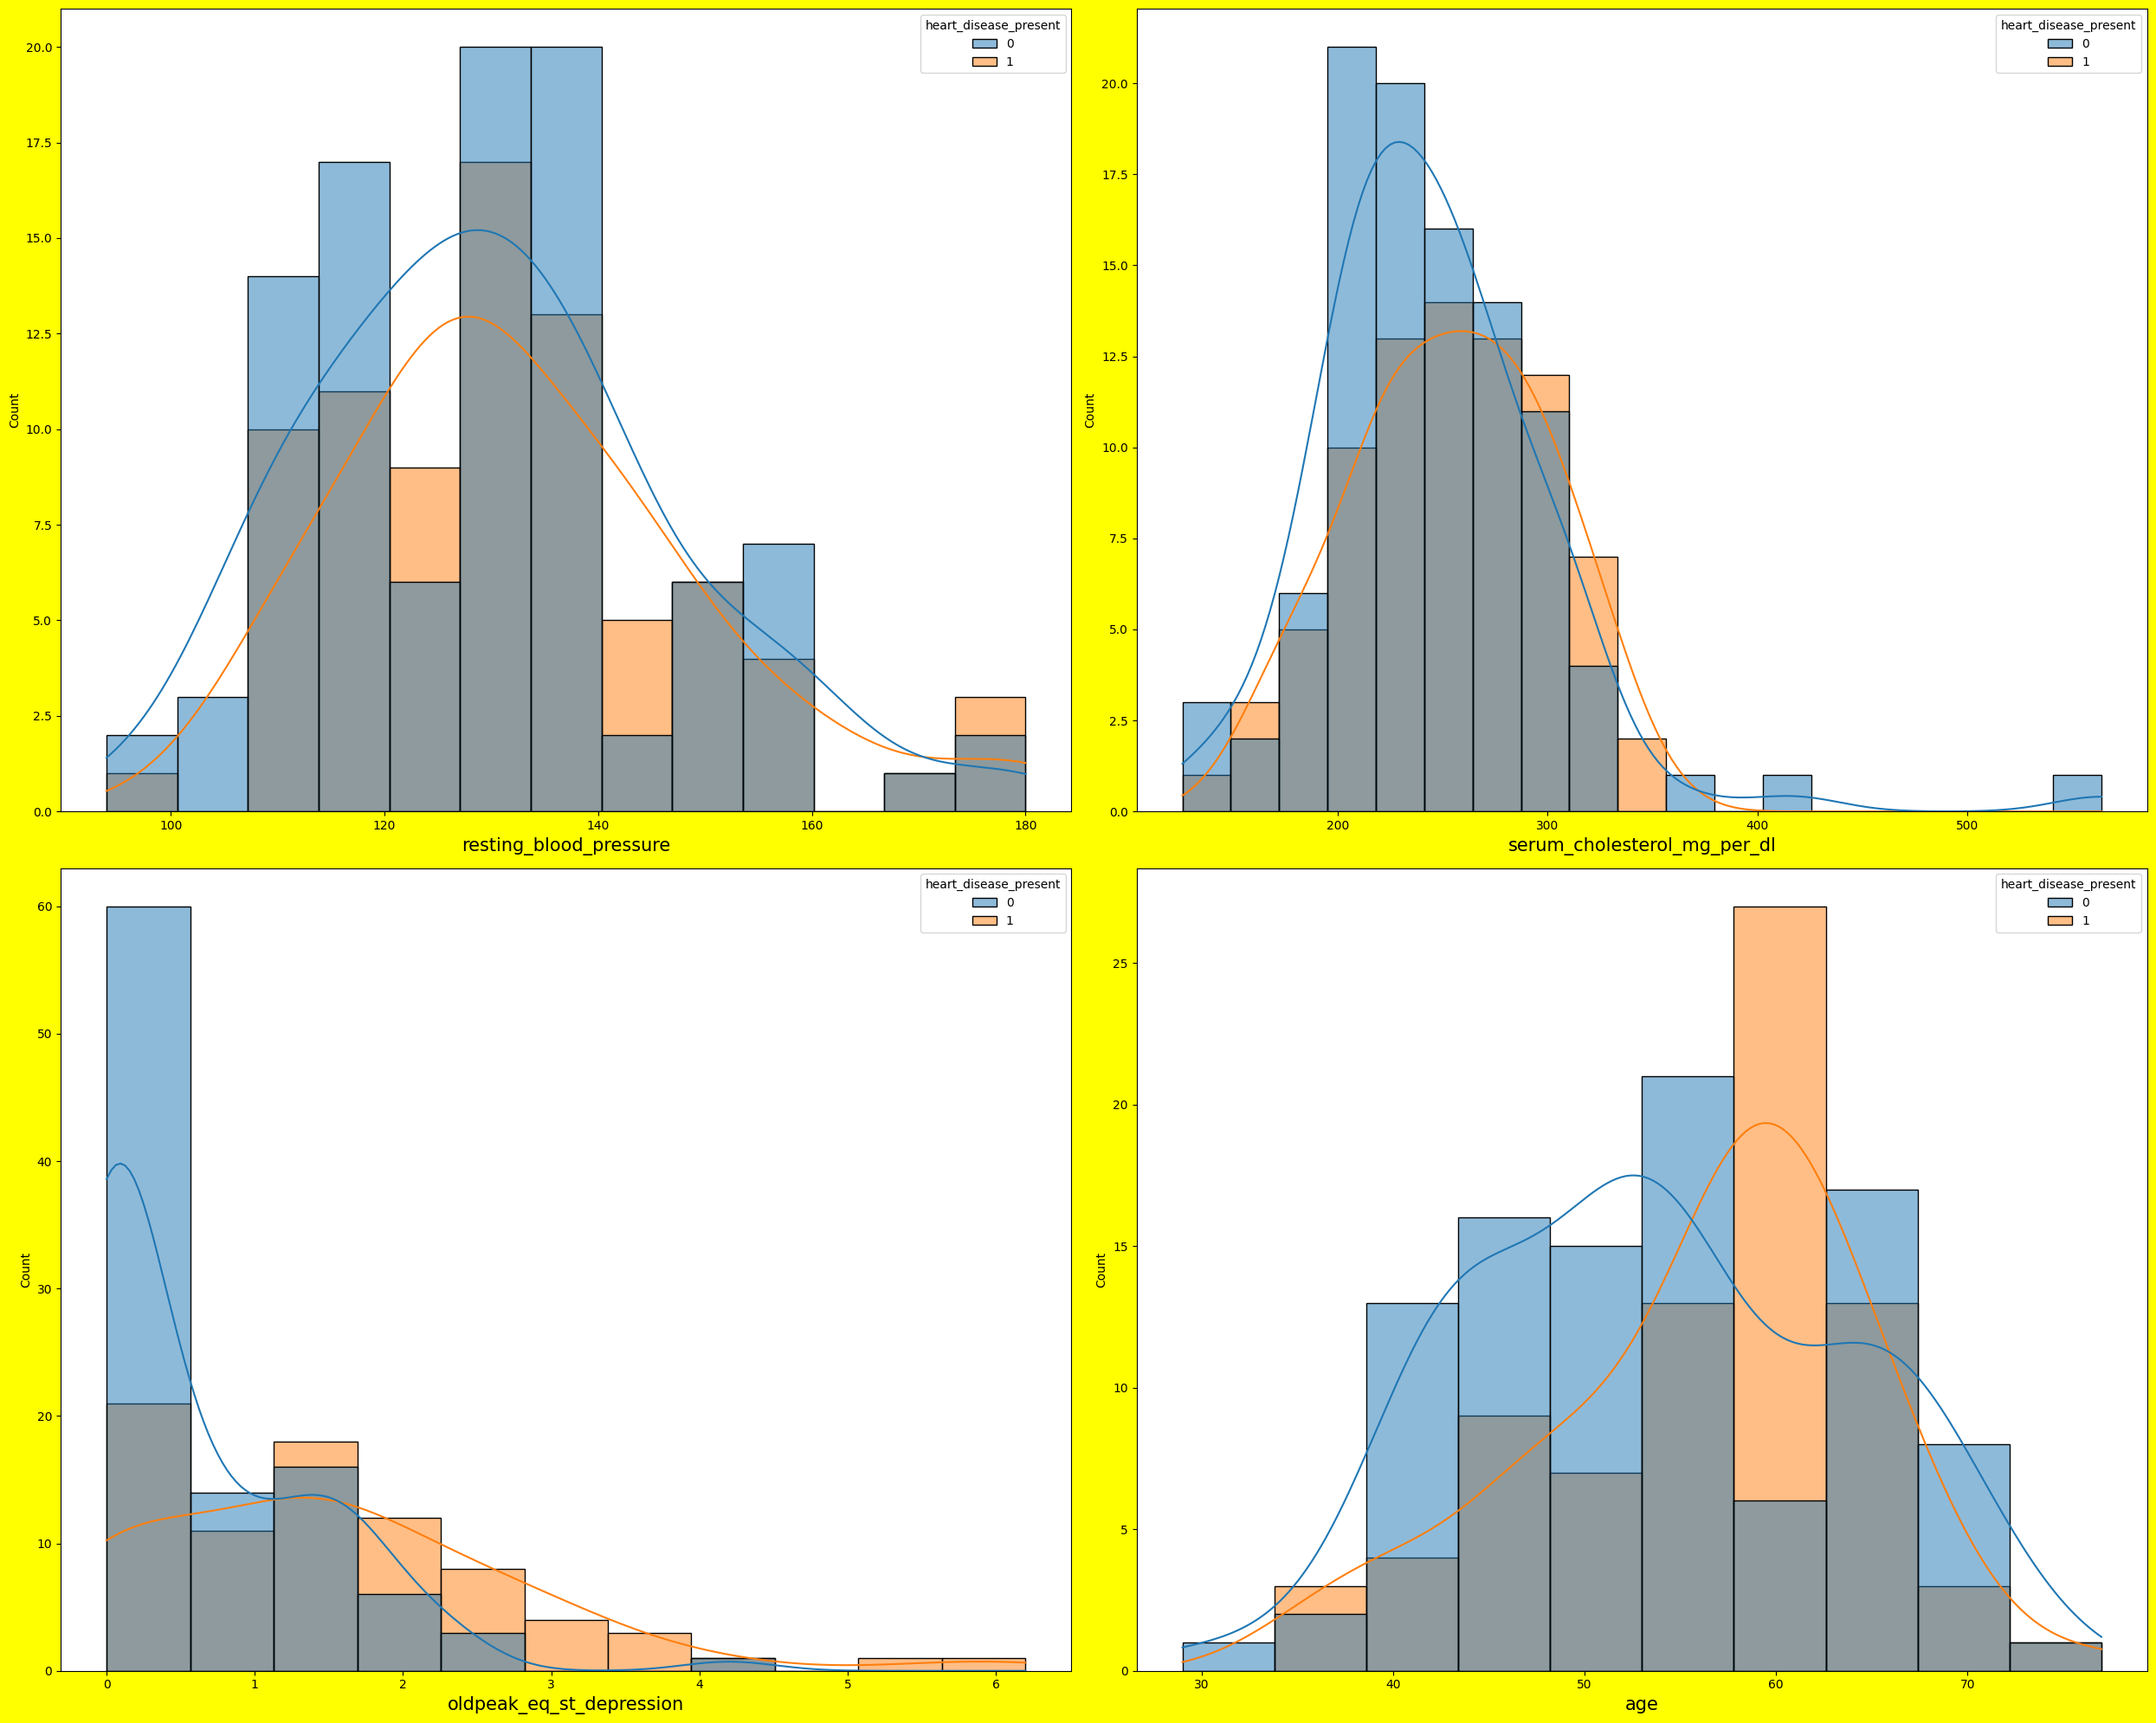

In [22]:
plt.figure(figsize = (25,20) , facecolor = "yellow")
plotnumber = 1

for column in heatplt:
    if plotnumber<=4:
        ax = plt.subplot(2,2 , plotnumber)
        sns.histplot(x = data[column] ,hue = data["heart_disease_present" ],  kde = True)
        plt.xlabel(column, fontsize = 15)
    plotnumber +=1
plt.tight_layout()


# insights:-

1. Resting Blood Pressure (Upper Left)

Observation:
Those without heart disease tend to have resting blood pressure within the normal range (approximately 120 - 140 mmHg).
Those with heart disease tend to have slightly higher resting blood pressure.

Inference: There appears to be a correlation between higher resting blood pressure and the presence of heart disease.

3. Serum Cholesterol (Upper Right)

Observation:
Most individuals have serum cholesterol levels between 200-300 mg/dL, and those with heart disease show a wider range.
Cholesterol levels above 300 mg/dL are more commonly associated with individuals who have heart disease.

Inference: Higher cholesterol levels are linked to an increased risk of heart disease.

4. Oldpeak (Lower Left)

Observation:
Lower oldpeak values (close to 0) are predominantly found in those without heart disease.
Higher oldpeak values are more frequent in those with heart disease.
Inference: A higher oldpeak value indicates a greater likelihood of heart disease.

5. Age (Lower Right)

Observation:
The majority of those without heart disease fall between the ages of 30-60.
A significant number of those with heart disease are in the 50-60 age range.
Inference: Age is a risk factor for heart disease, especially for those aged 50 and above.

In [23]:
# Multivariate analysis:-

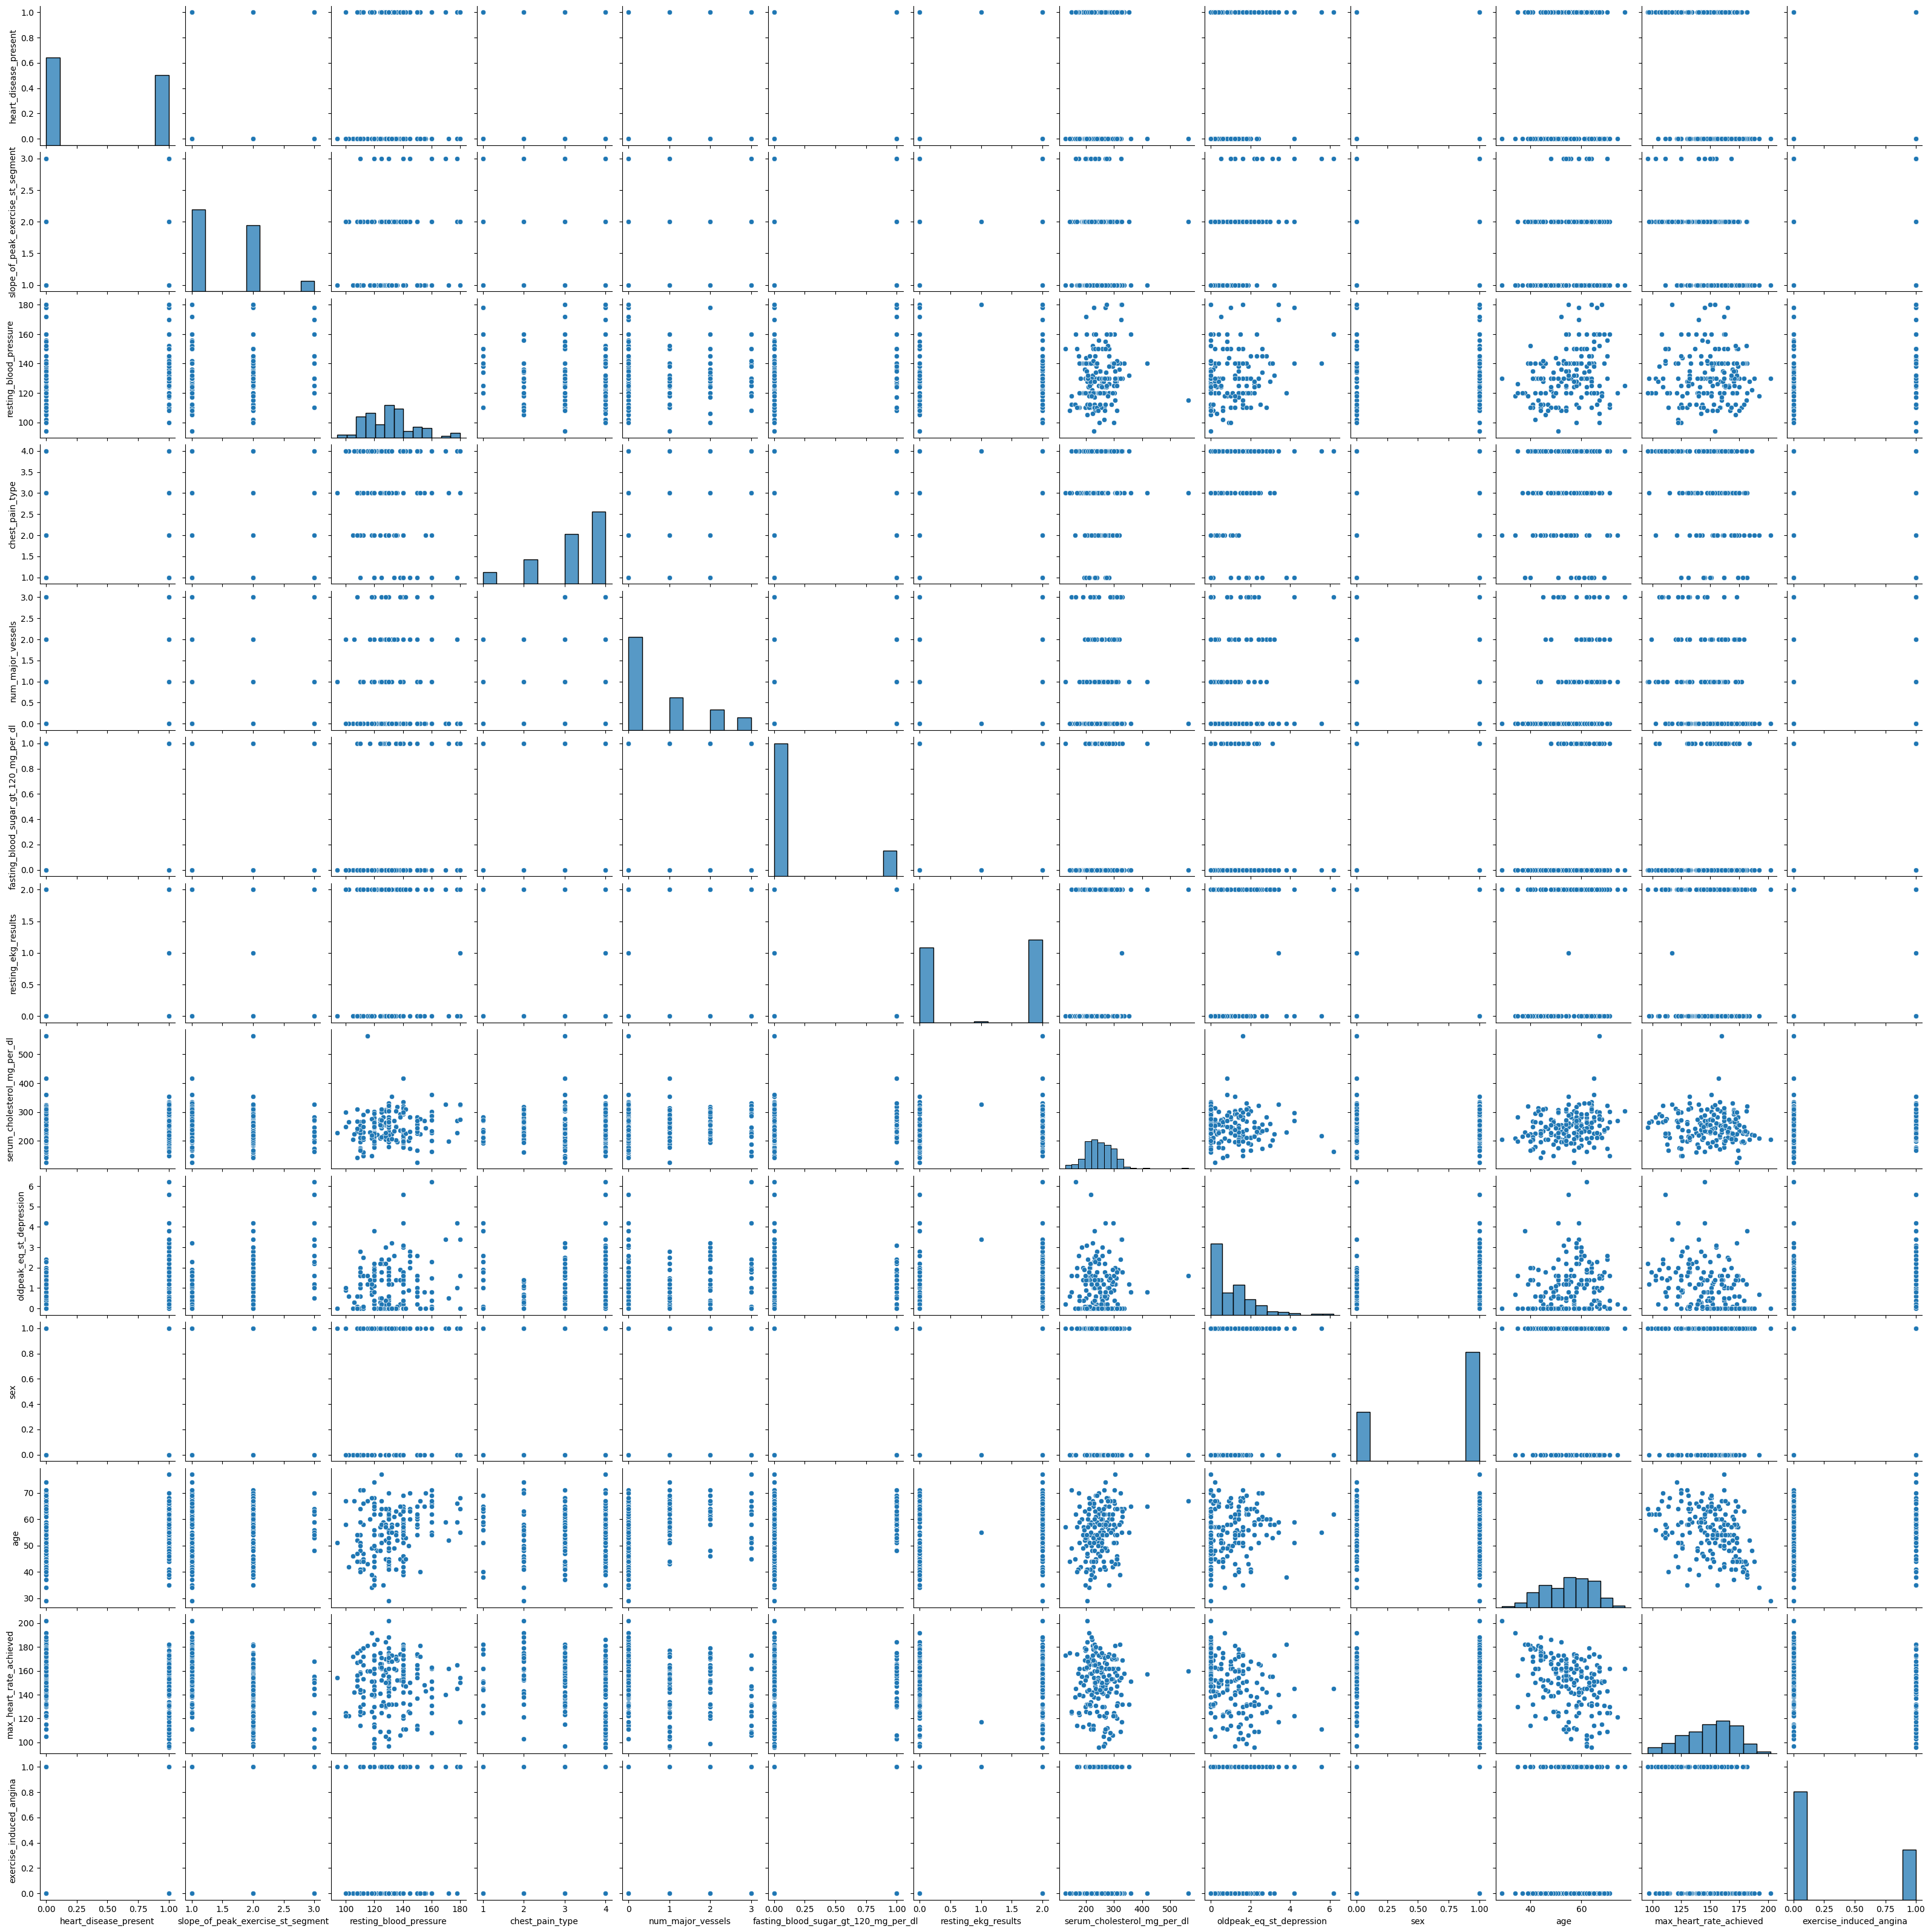

In [24]:
sns.pairplot(data)

# 7. data preprocessing:-

In [25]:
# step 1 missing value handle

In [26]:
# check missing value
data.isnull().sum()

heart_disease_present                   0
patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [27]:
# step 2 duplicate value

In [28]:
# check duplicated value
data.duplicated().sum()

0

In [29]:
data.serum_cholesterol_mg_per_dl.unique()

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219, 302, 226, 335,
       236, 231, 200, 234, 253, 204, 319, 233, 228, 245, 211, 303, 205,
       185, 175, 225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252,
       265, 417, 267, 261, 149, 281, 311, 315, 330, 256, 239, 295, 197,
       564, 305, 283, 160, 254, 282, 322, 250, 188, 220, 199, 215, 218,
       196, 266, 229, 259, 268, 177, 168, 262, 271, 299, 293, 141, 277,
       212, 321, 294, 313, 232, 289, 213, 274, 263, 244, 298, 172, 353,
       210, 192, 246, 286, 360, 174, 227, 248, 224, 300, 235, 217, 193,
       167, 216, 195, 309, 273, 198, 290, 275, 206, 164, 207, 249, 327,
       201], dtype=int64)

In [30]:
# step 3 check outliers

In [31]:
# check the outliers

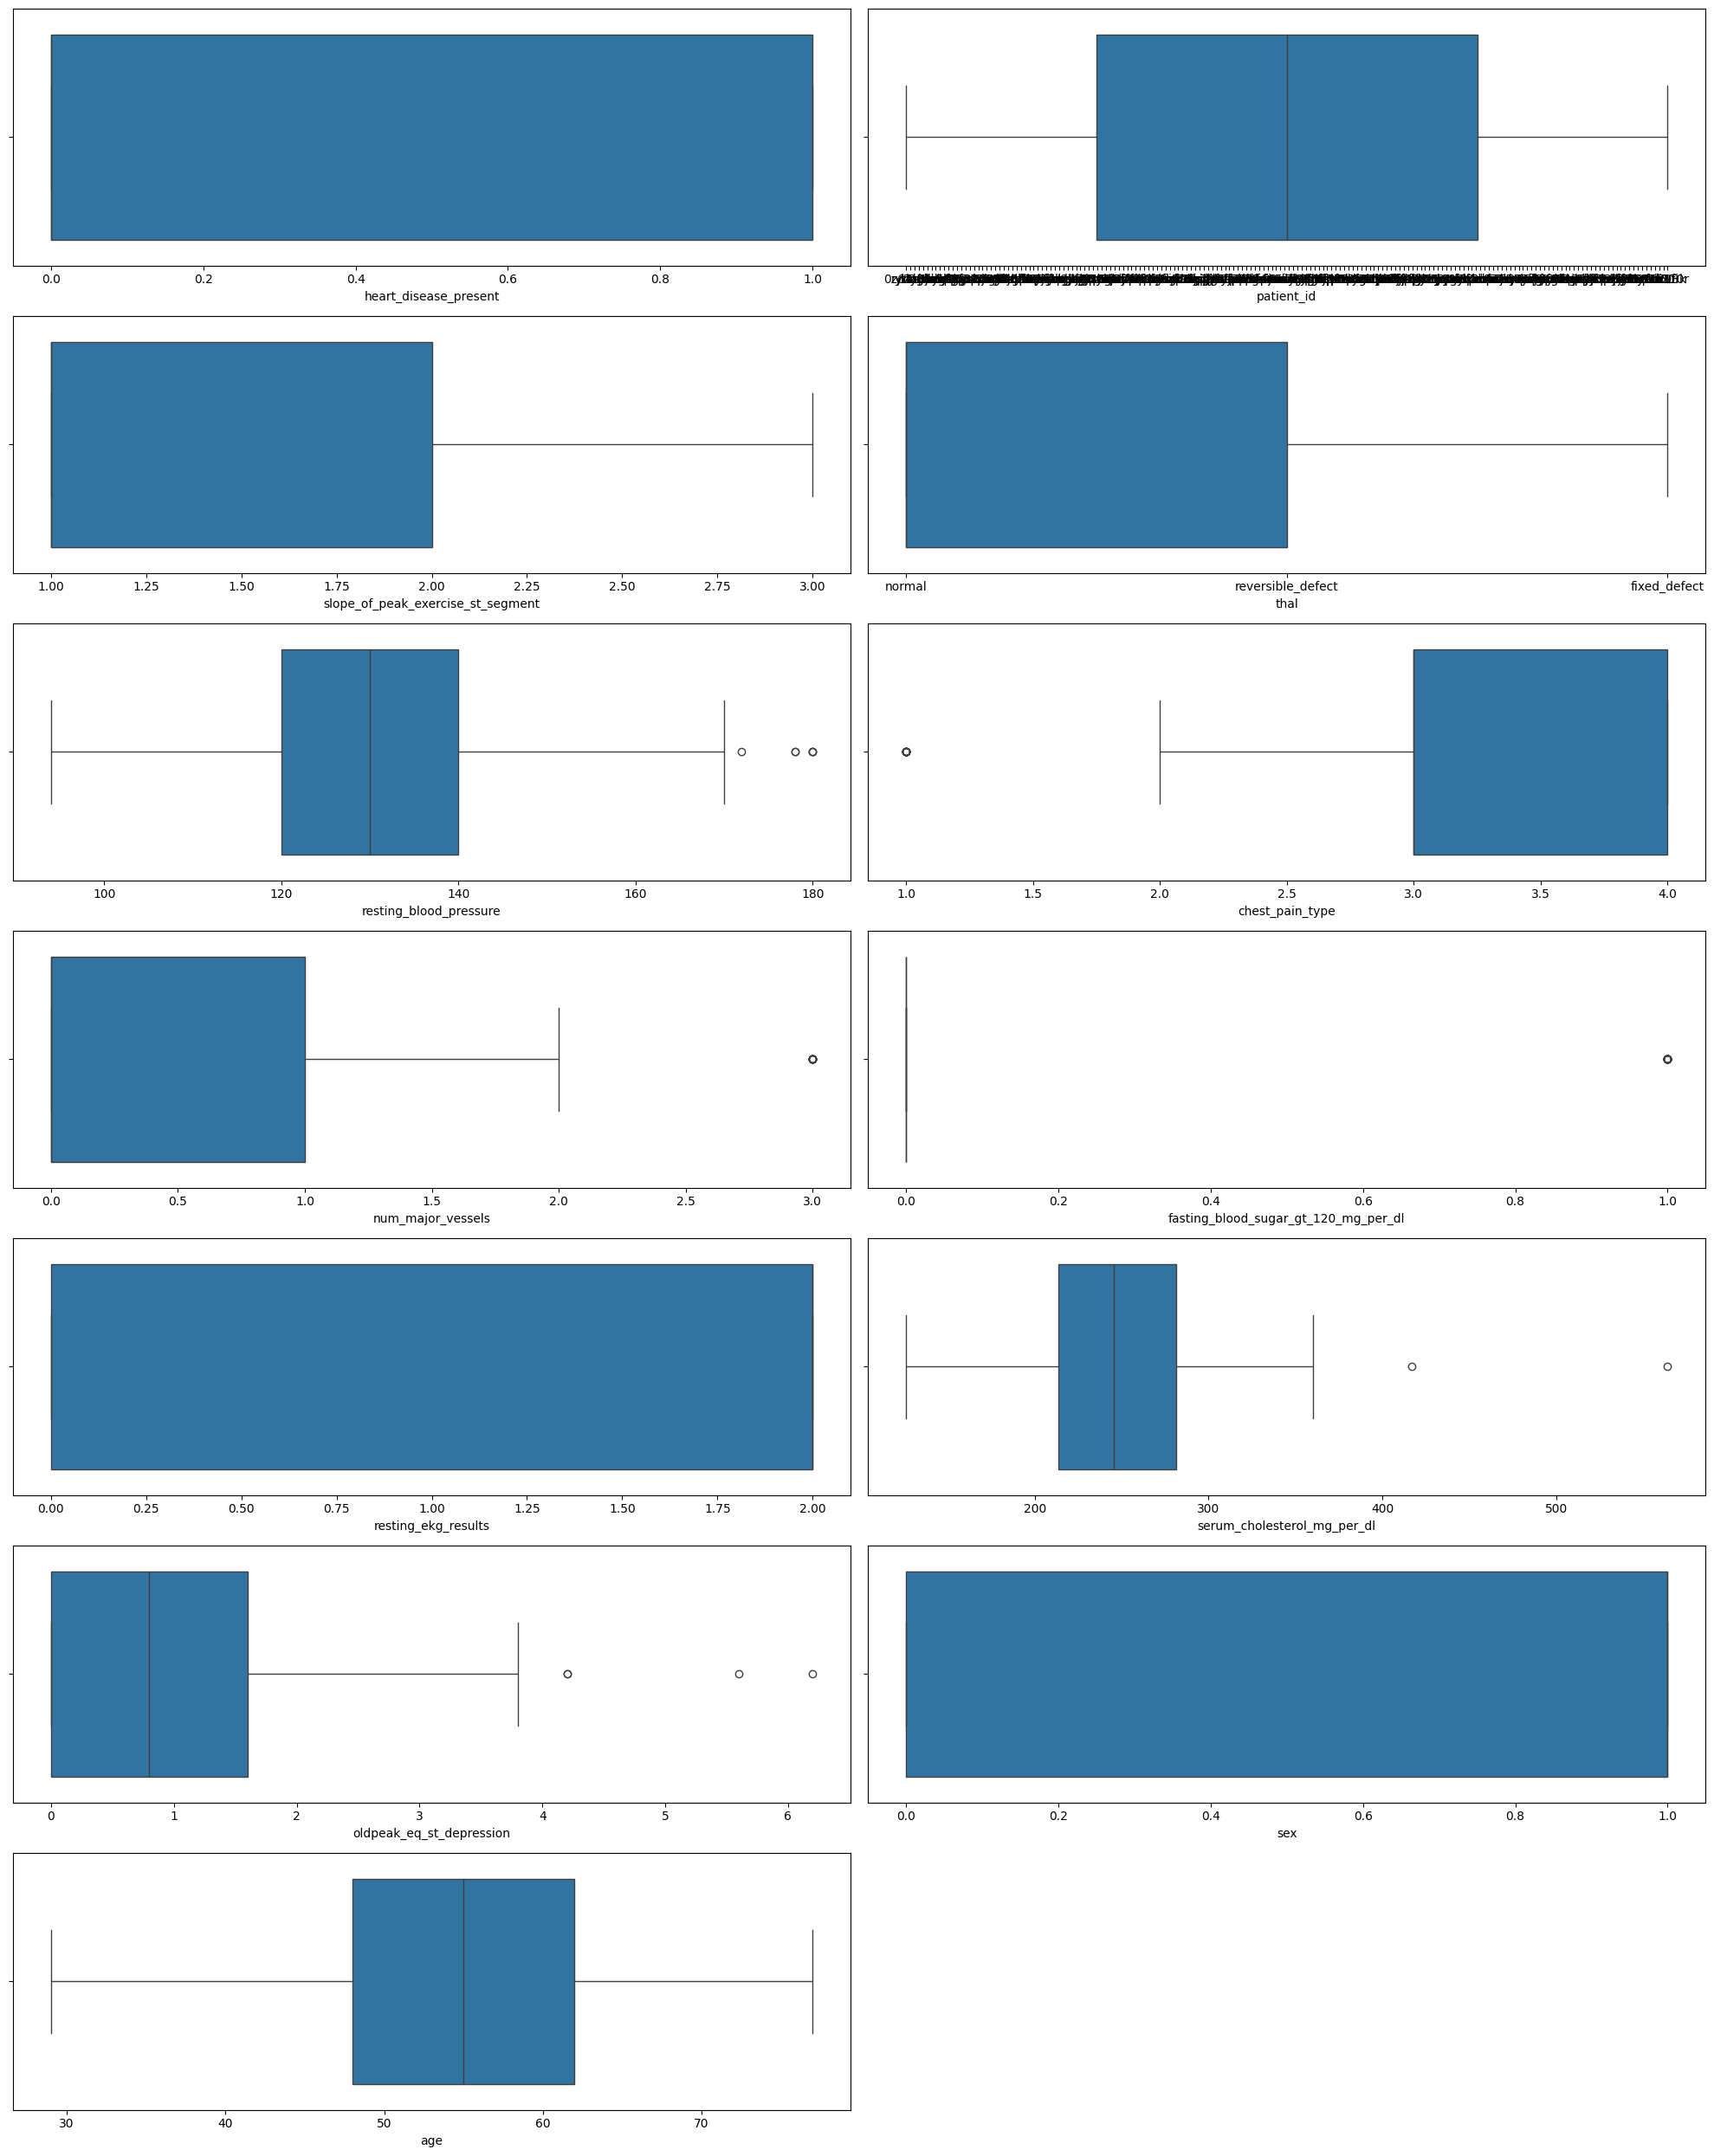

In [32]:
plt.figure(figsize = (20,25 ), facecolor = "white")

plotnumber = 1

for column in data:
    if plotnumber <=13:
        ax = plt.subplot( 7,2 , plotnumber)
        sns.boxplot(x = data [column])
        plt.xlabel(column , fontsize = 10)
    plotnumber +=1
plt.tight_layout()


In [33]:
# oldpeak_eq_st_depression ,serum_cholesterol_mg_per_dl ,fasting_blood_sugar_gt_120_mg_per_dl ,num_major_vessels ,chest_pain_type , resting_blood_pressure

In [34]:
# oldpeak_eq_st_depression.................

In [35]:
Q1 = data["oldpeak_eq_st_depression" ].quantile(0.25)
print(Q1)

Q3 = data["oldpeak_eq_st_depression"].quantile(0.75)
print(Q3)


0.0
1.6


In [36]:
IQR = Q3-Q1
print(IQR)

1.6


In [37]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

4.0
-2.4000000000000004


In [38]:
data.loc[data["oldpeak_eq_st_depression"]>upper_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
112,1,6r9x2j,2,reversible_defect,140,4,3,0,0,298,4.2,1,51,122,1
140,1,noxsnw,3,reversible_defect,140,4,0,0,0,217,5.6,1,55,111,1
162,1,usnkhx,3,reversible_defect,160,4,3,0,2,164,6.2,0,62,145,0


In [39]:
data.loc[data["oldpeak_eq_st_depression"]<lower_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [40]:
# impiting theoutliers
data.loc[data["oldpeak_eq_st_depression"]>upper_limit , "oldpeak_eq_st_depression"] = data["oldpeak_eq_st_depression"].median()

In [41]:
data.loc[data["oldpeak_eq_st_depression"]>upper_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [42]:
# serum_cholesterol_mg_per_dl....................

In [43]:
Q1 = data["serum_cholesterol_mg_per_dl" ].quantile(0.25)
print(Q1)

Q3 = data["serum_cholesterol_mg_per_dl"].quantile(0.75)
print(Q3)


213.75
281.25


In [44]:
IQR = Q3-Q1
print(IQR)

67.5


In [45]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

382.5
112.5


In [46]:
data.loc[data["serum_cholesterol_mg_per_dl"]>upper_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
43,0,yx0q6k,1,normal,140,3,1,1,2,417,0.8,0,65,157,0
60,0,rv6siv,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0


In [47]:
data.loc[data["serum_cholesterol_mg_per_dl"]<lower_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [48]:
data.loc[data["serum_cholesterol_mg_per_dl"]>upper_limit , "serum_cholesterol_mg_per_dl"] = data["serum_cholesterol_mg_per_dl"].median()

In [49]:
data.serum_cholesterol_mg_per_dl.unique()

array([308. , 214. , 304. , 223. , 270. , 180. , 258. , 276. , 326. ,
       219. , 302. , 226. , 335. , 236. , 231. , 200. , 234. , 253. ,
       204. , 319. , 233. , 228. , 245. , 211. , 303. , 205. , 185. ,
       175. , 225. , 203. , 325. , 230. , 222. , 126. , 209. , 269. ,
       255. , 243. , 252. , 265. , 245.5, 267. , 261. , 149. , 281. ,
       311. , 315. , 330. , 256. , 239. , 295. , 197. , 305. , 283. ,
       160. , 254. , 282. , 322. , 250. , 188. , 220. , 199. , 215. ,
       218. , 196. , 266. , 229. , 259. , 268. , 177. , 168. , 262. ,
       271. , 299. , 293. , 141. , 277. , 212. , 321. , 294. , 313. ,
       232. , 289. , 213. , 274. , 263. , 244. , 298. , 172. , 353. ,
       210. , 192. , 246. , 286. , 360. , 174. , 227. , 248. , 224. ,
       300. , 235. , 217. , 193. , 167. , 216. , 195. , 309. , 273. ,
       198. , 290. , 275. , 206. , 164. , 207. , 249. , 327. , 201. ])

In [50]:
data['serum_cholesterol_mg_per_dl'] = data['serum_cholesterol_mg_per_dl'].replace('245.5', '245')

In [51]:
# resting_blood_pressure .............................

In [52]:
Q1 = data["resting_blood_pressure" ].quantile(0.25)
print(Q1)

Q3 = data["resting_blood_pressure"].quantile(0.75)
print(Q3)


120.0
140.0


In [53]:
IQR = Q3-Q1
print(IQR)

20.0


In [54]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

170.0
90.0


In [55]:
data.loc[data["resting_blood_pressure"]>upper_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270.0,0.8,1,59,145,0
33,0,0n5fu0,1,normal,180,4,0,0,0,325.0,0.0,0,64,154,1
72,0,qwj1yf,1,reversible_defect,172,3,0,1,0,199.0,0.5,1,52,162,0
75,1,4v0q7o,2,reversible_defect,178,4,2,1,0,228.0,1.0,0,66,165,1
113,1,sqddbc,2,reversible_defect,180,3,0,1,2,274.0,1.6,1,68,150,1
176,1,2s2b1f,2,normal,180,4,0,0,1,327.0,3.4,0,55,117,1


In [56]:
data.loc[data["resting_blood_pressure"]<lower_limit]

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [57]:
data.loc[data["resting_blood_pressure"]>upper_limit , "resting_blood_pressure"] = data["resting_blood_pressure"].median()

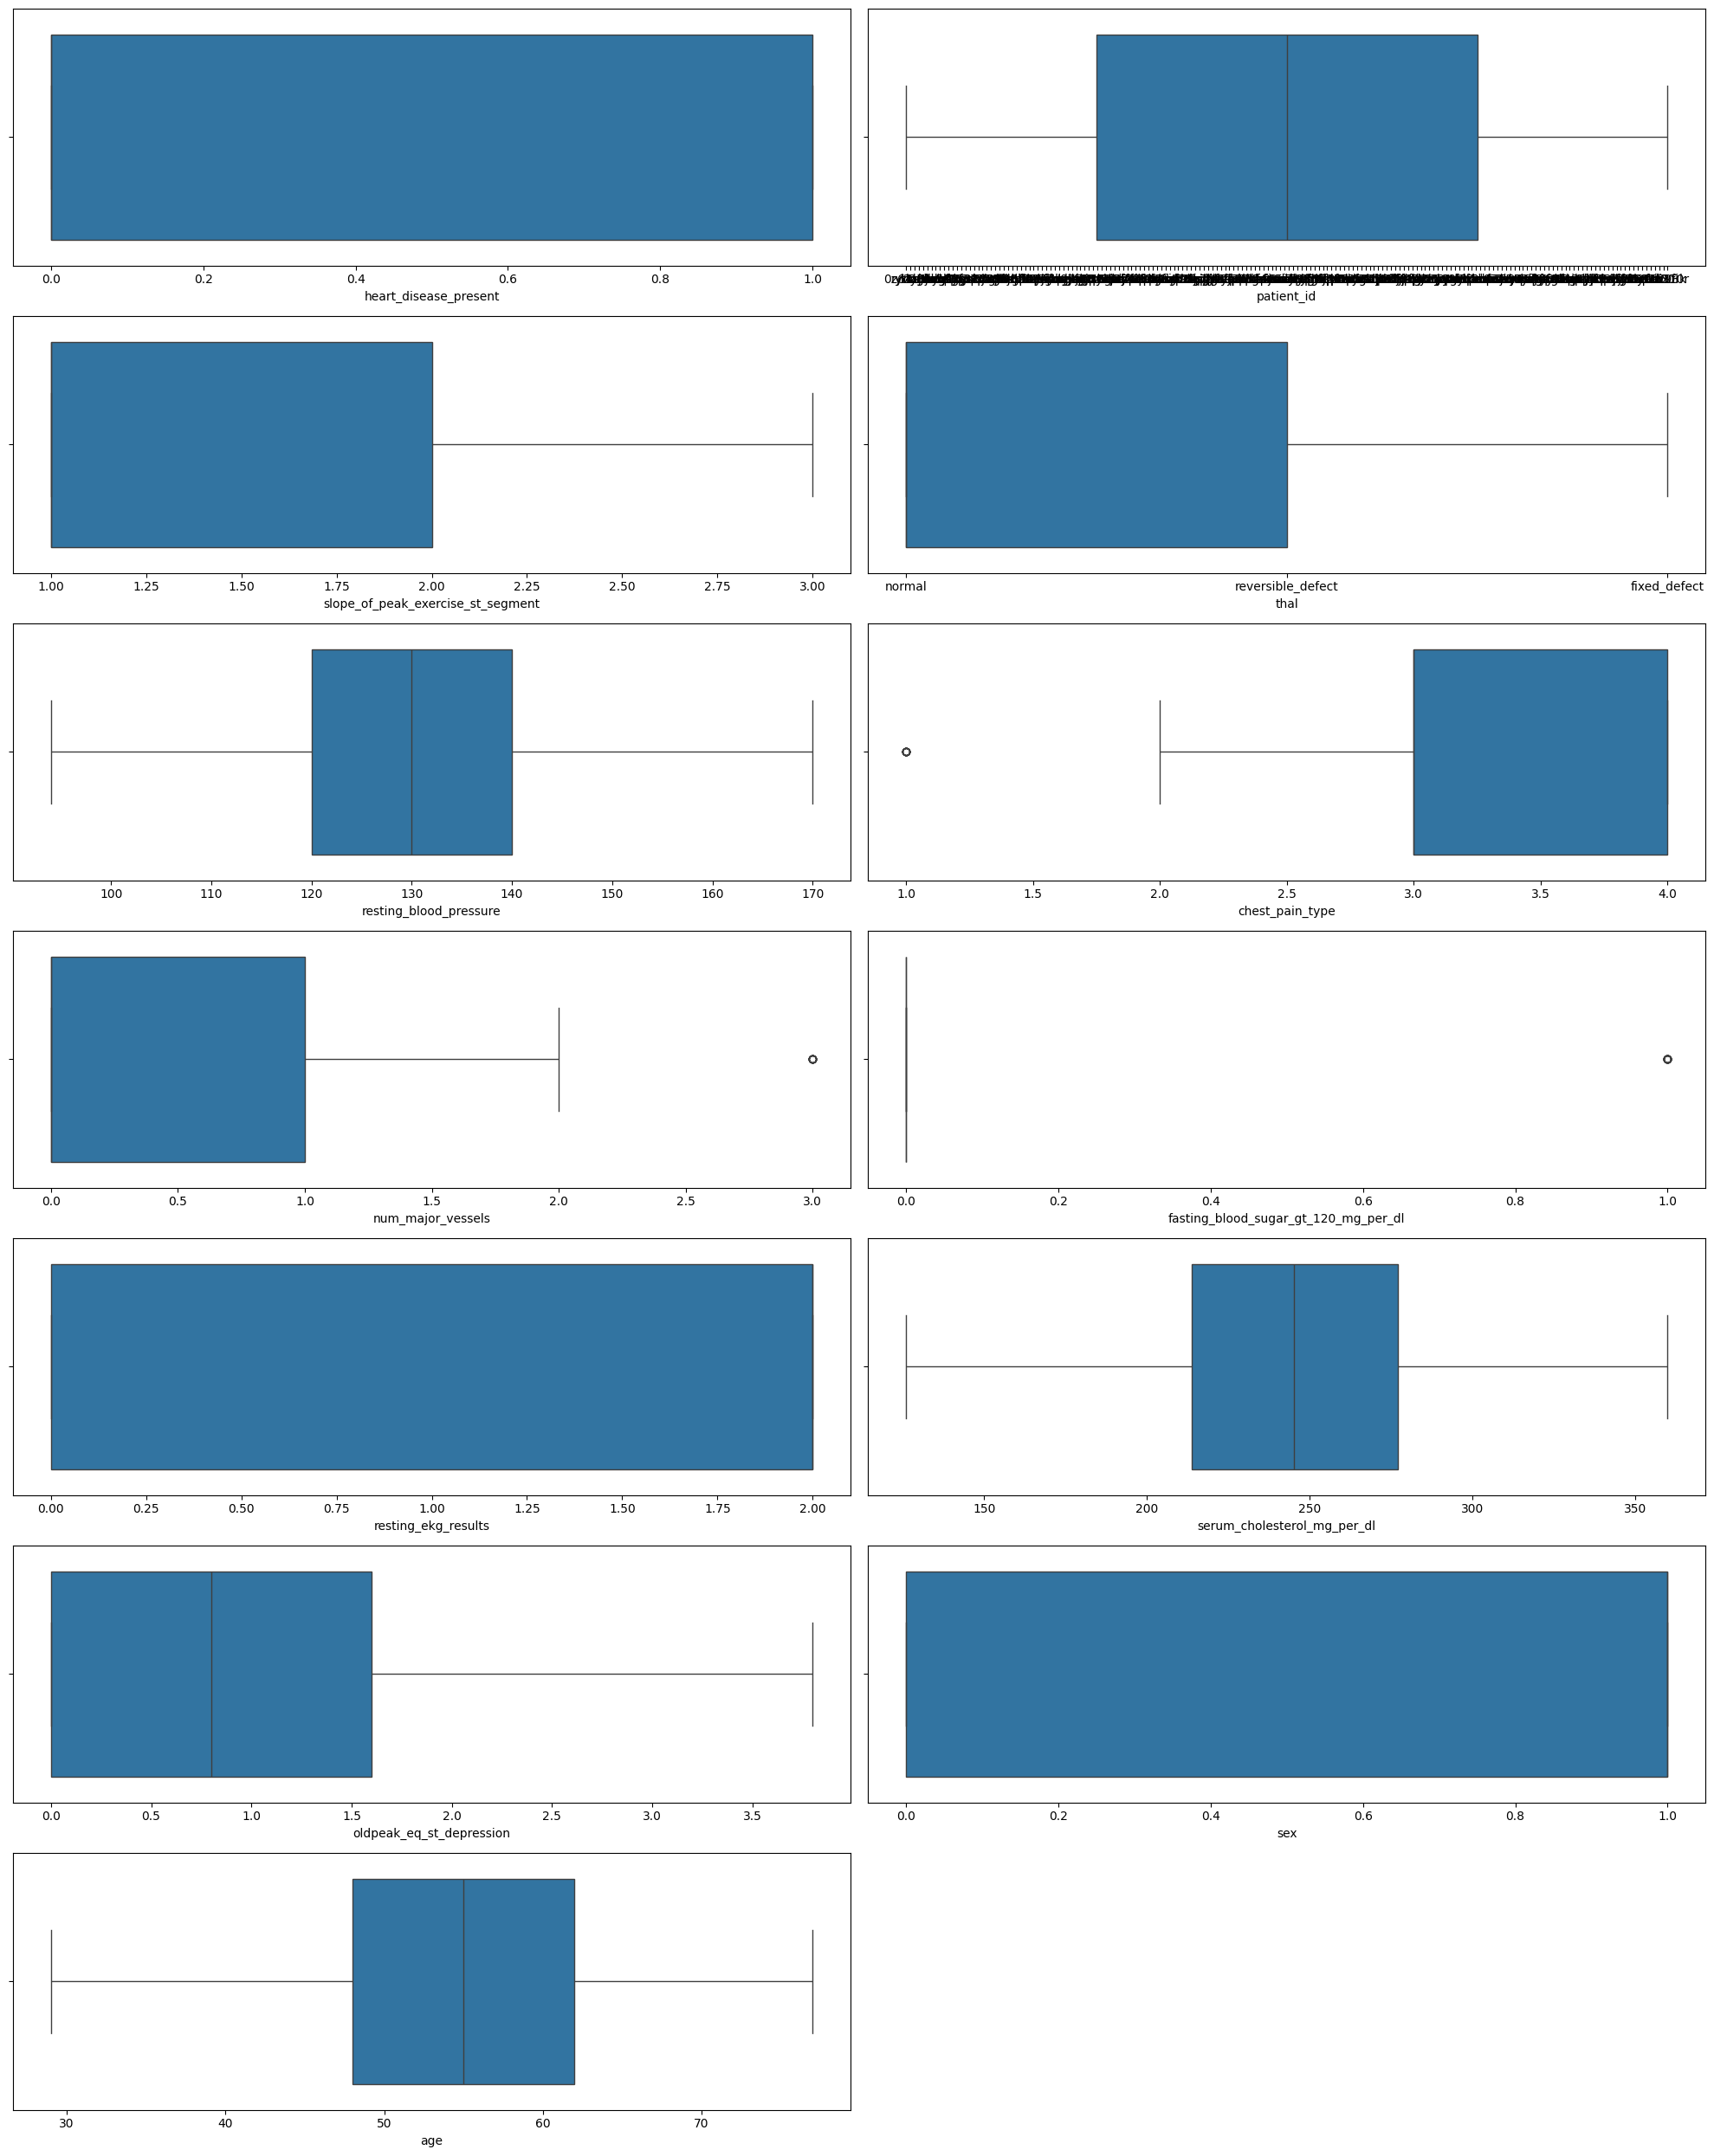

In [58]:
plt.figure(figsize = (20,25 ), facecolor = "white")

plotnumber = 1

for column in data:
    if plotnumber <=13:
        ax = plt.subplot( 7,2 , plotnumber)
        sns.boxplot(x = data [column])
        plt.xlabel(column , fontsize = 10)
    plotnumber +=1
plt.tight_layout()

In [59]:
data.head(3)

,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,0z64un,1,normal,128,2,0,0,2,308.0,0.0,1,45,170,0
1,0,ryoo3j,2,normal,110,3,0,0,0,214.0,1.6,0,54,158,0
2,1,yt1s1x,1,normal,125,4,3,0,2,304.0,0.0,1,77,162,1


In [60]:
# step 4 encoding 

 conversion of categorical data into numerical data

In [61]:
data["patient_id"].unique()

array(['0z64un', 'ryoo3j', 'yt1s1x', 'l2xjde', 'oyt4ek', 'ldukkw',
       '2gbyh9', 'daa9kp', '3nwy2n', '1r508r', 'ldg4b9', 'xc17yq',
       'mpggsq', 'zlyac8', 'f06u72', '2fv3rc', 'qyrkxn', '237mql',
       'mc750a', '30v796', 'cvux3j', 'k8899q', 'jhdvtb', '5g9v0h',
       '83asqd', 'gla0im', 'zzmfh7', 'f4g1ay', 'lek9q9', '8265rl',
       '6017a1', 'z7xkou', 'k7ef7h', '0n5fu0', '55xksg', 'pjgqa3',
       'xkdz7j', 'tpuevg', 'ascl42', '1xwoe6', 'ty4ik8', 'gx6yxl',
       'hlmts5', 'yx0q6k', 'ep1o51', 'gj1e5z', '6219kl', 'rp9g6x',
       '1aeaff', 'y3prof', '3drd48', 'ejo7p3', 'r7y4i1', 'mznwxv',
       '27oevk', 'jwqi3k', '328lkl', 'tlk9o8', 'aq2vrq', 'ilogfb',
       'rv6siv', 'm2a4i9', 'pwigd8', 'qwapdq', '4sd1xn', 'nck22c',
       'm6zksp', 'f70grj', 'k1art8', 'mcwqgs', '3jsjqk', 'ik7hfs',
       'qwj1yf', 'qvhk9e', 'igwnqo', '4v0q7o', 'hh2awp', 'vfjppl',
       '6lu42b', 'shiro4', '3wl3z4', 'ebioez', '37c0vm', 'v52zcs',
       '6nkcaw', 'hfp05i', 'grfxwd', 'bvcxah', 'i49srr', '93db

In [62]:
data.drop(['patient_id'],axis=1,inplace=True)
data.head()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308.0,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214.0,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304.0,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223.0,0.0,1,40,181,0
4,0,3,reversible_defect,130,1,0,0,2,270.0,0.8,1,59,145,0


In [63]:
data["thal"].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [64]:
data["thal"].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [65]:
# manual encoding

In [66]:
data.thal=data.thal.map({'normal':2,'reversible_defect':1,'fixed_defect':0})

In [67]:
data.columns

Index(['heart_disease_present', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [68]:
# step 5 scaling the continuous data

In [69]:

from sklearn.preprocessing import StandardScaler

# Numeric columns (e.g., engine_size, horsepower, etc.)
numeric_columns = ['slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']

# Apply StandardScaler for feature scaling
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print the scaled DataFrame
print(data.head())

##########

   heart_disease_present  slope_of_peak_exercise_st_segment      thal  \
0                      0                          -0.891241  0.858898   
1                      0                           0.729197  0.858898   
2                      1                          -0.891241  0.858898   
3                      1                          -0.891241 -0.858898   
4                      0                           2.349636 -0.858898   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0               -0.117432        -1.234775          -0.718403   
1               -1.352755        -0.166220          -0.718403   
2               -0.323319         0.902335           2.385097   
3                1.529666         0.902335          -0.718403   
4                0.019826        -2.303330          -0.718403   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                             -0.438238             0.953850   
1                             -0.438238   

# 8 . feature selection:-

<Axes: >

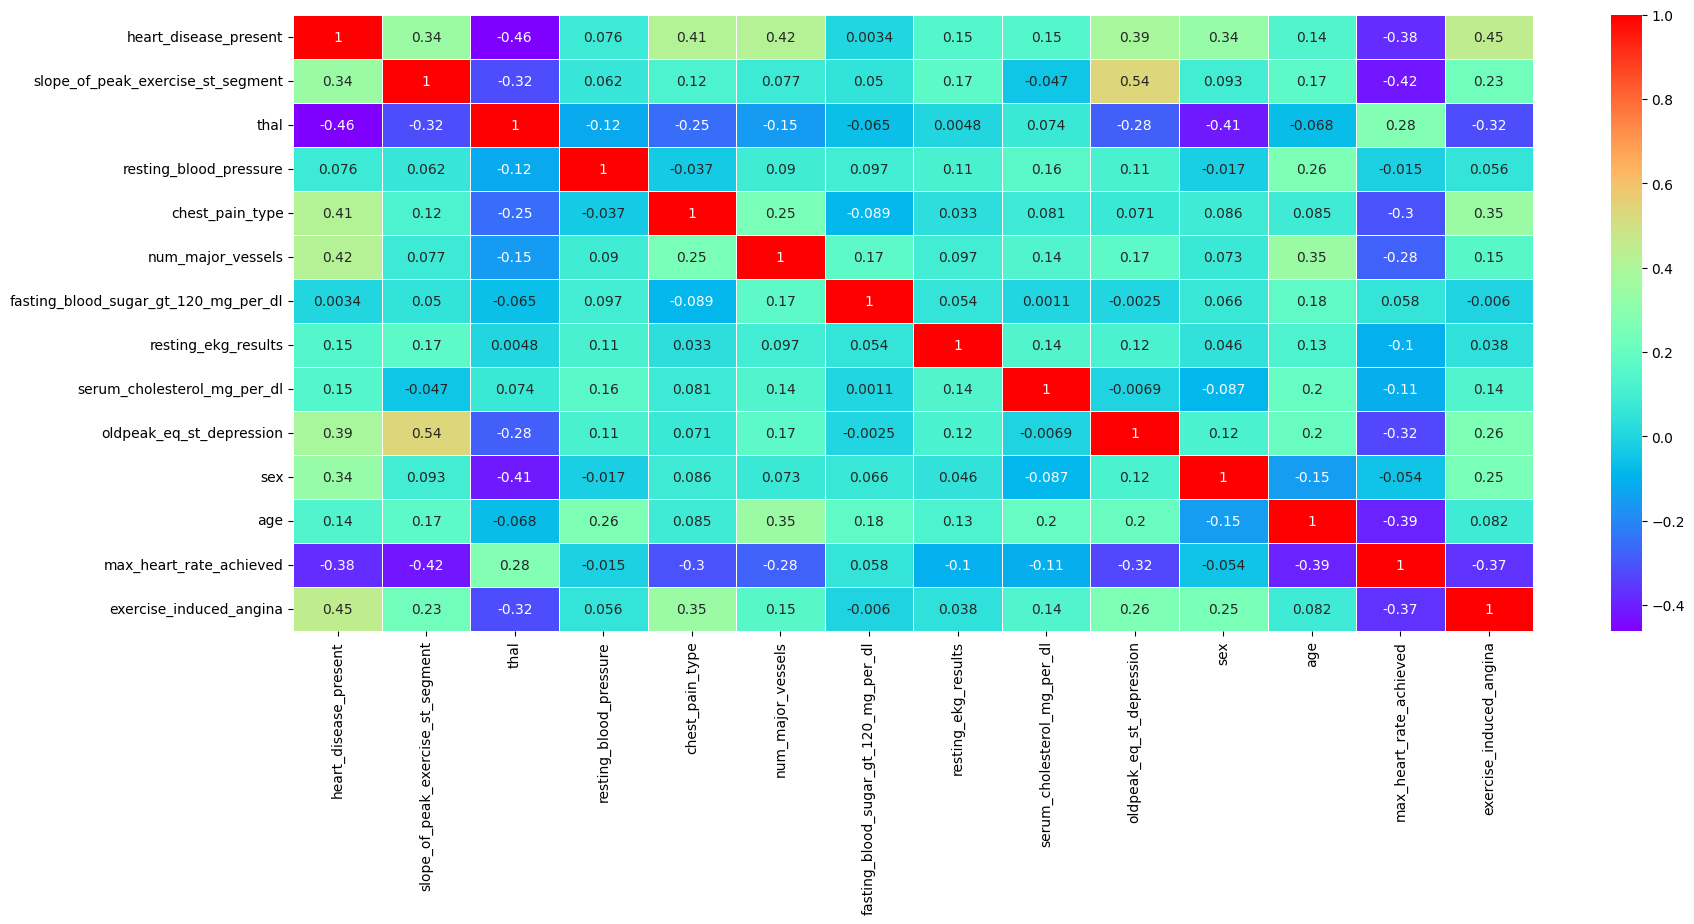

In [70]:
## check corr-relaction 
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,cmap='rainbow')

# 9. model creation:-

In [71]:
data.shape

(180, 14)

In [72]:
# step 1:-

In [73]:
# creating input and output variable

In [74]:
X = data.drop("heart_disease_present" , axis = 1)

In [75]:
y= data["heart_disease_present"]

In [76]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [77]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,-0.891241,0.858898,-0.117432,-1.234775,-0.718403,-0.438238,0.953850,1.358696,-0.985690,0.672022,-1.053964,0.932485,-0.680746
1,0.729197,0.858898,-1.352755,-0.166220,-0.718403,-0.438238,-1.054255,-0.717635,0.736875,-1.488048,-0.087134,0.387084,-0.680746
2,-0.891241,0.858898,-0.323319,0.902335,2.385097,-0.438238,0.953850,1.270341,-0.985690,0.672022,2.383654,0.568884,1.468977
3,-0.891241,-0.858898,1.529666,0.902335,-0.718403,-0.438238,-1.054255,-0.518837,-0.985690,0.672022,-1.591092,1.432436,-0.680746
4,2.349636,-0.858898,0.019826,-2.303330,-0.718403,-0.438238,0.953850,0.519328,-0.124407,0.672022,0.449994,-0.203768,-0.680746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.729197,-0.858898,-0.323319,0.902335,1.350597,2.281863,-1.054255,0.165910,-0.770369,0.672022,1.309398,0.614334,-0.680746
176,0.729197,0.858898,0.019826,0.902335,-0.718403,-0.438238,-0.050203,1.778380,2.674760,-1.488048,0.020291,-1.476372,1.468977
177,0.729197,-0.858898,-0.323319,-0.166220,-0.718403,-0.438238,-1.054255,1.380785,0.952195,0.672022,0.987122,-0.840070,1.468977
178,-0.891241,0.858898,-0.391948,-0.166220,1.350597,2.281863,-1.054255,0.187999,-0.985690,0.672022,-0.731688,1.159736,-0.680746


In [78]:
# step 2:-

In [79]:
# split the data into training and testing 

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [81]:
X_train.shape

(144, 13)

In [82]:
X_test.shape

(36, 13)

In [83]:
# balancing the data

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=34)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [86]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

In [87]:
# step 3:-

In [88]:
# import the model

# evaluation of model:-

# Logistic Regression

In [89]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix



# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)
y_predlog = LR.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_predlog)
f1 = f1_score(y_test, y_predlog, average='weighted')
recall = recall_score(y_test, y_predlog, average='weighted')
cls_report = classification_report(y_test, y_predlog)
conf_matrix = confusion_matrix(y_test, y_predlog)

print("Model: Logistic Regression")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9166666666666666
F1 Score: 0.9167310167310168
Recall: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.89      0.94      0.91        17

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

Confusion Matrix:
[[17  2]
 [ 1 16]]
--------------------------------------------------


# Support Vector Machine (SVM)

In [90]:
from sklearn.svm import SVC

# SVM
SVM = SVC()
SVM.fit(X_train_res, y_train_res)
y_pred_svm = SVM.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
cls_report = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Model: SVM")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: SVM
Accuracy: 0.8889
F1 Score: 0.8889
Recall: 0.8889
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.88      0.88      0.88        17

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36

Confusion Matrix:
[[17  2]
 [ 2 15]]
--------------------------------------------------


# K-Nearest Neighbors (KNN)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train_res, y_train_res)
y_pred_knn = KNN.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
cls_report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Model: KNN")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: KNN
Accuracy: 0.8056
F1 Score: 0.8051
Recall: 0.8056
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.75      0.88      0.81        17

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36

Confusion Matrix:
[[14  5]
 [ 2 15]]
--------------------------------------------------


# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train_res, y_train_res)
y_pred_rf = RF.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
cls_report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Model: Random Forest")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Random Forest
Accuracy: 0.9166666666666666
F1 Score: 0.9167310167310168
Recall: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.89      0.94      0.91        17

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

Confusion Matrix:
[[17  2]
 [ 1 16]]
--------------------------------------------------


In [93]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.80851064 0.8627451  0.76363636]
Cross validation Score: 0.8116306999911506
Std : 0.040521075976674606


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Initialize the model
rf_model = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,  # Parameter distribution to sample from
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Verbose level
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_res, y_train_res)

# Best parameters found
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best Accuracy: 0.8462121212121211


#  Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train_res, y_train_res)
y_pred_dt = DT.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
cls_report = classification_report(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("Model: Decision Tree")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Decision Tree
Accuracy: 0.75
F1 Score: 0.7494208494208494
Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.70      0.82      0.76        17

    accuracy                           0.75        36
   macro avg       0.76      0.75      0.75        36
weighted avg       0.76      0.75      0.75        36

Confusion Matrix:
[[13  6]
 [ 3 14]]
--------------------------------------------------


In [96]:
# from sklearn.model_selection import RandomizedSearchCV



# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'splitter': ['best', 'random']
# }

# # Model create
# dt2 = DecisionTreeClassifier()

# # RandomizedSearchCV 
# random_search = RandomizedSearchCV(estimator=dt2, param_distributions=param_dist,
#                                    n_iter=100, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42, verbose=2)

# # Train 
# random_search.fit(X_train_res, y_train_res)

# # Best parameters and accuracy check
# print(f"Best Hyperparameters: {random_search.best_params_}")
# print(f"Best Accuracy: {random_search.best_score_}")

# # Test Set  prediction
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Results print 
# accuracy = accuracy_score(y_test, y_pred)
# cls_report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f"Test Accuracy: {accuracy:.4f}")
# print("Classification Report:")
# print(cls_report)
# print("Confusion Matrix:")
# print(conf_matrix)


In [97]:
from sklearn.model_selection import RandomizedSearchCV
param_distribution={'criterion':('gini','entropy'),
                    'splitter':('best','random'),
                    'max_depth':[1,3,5,13,16,18,15,6,9,7,19],
                    'min_samples_leaf':[34,12,10,1,2,4,6,7,18,16,15,13],
                    'min_samples_split':[2,3,4]}

In [98]:
dt1=DecisionTreeClassifier(random_state=3)
random_dt=RandomizedSearchCV(estimator=dt1,
                             param_distributions=param_distribution,
                             scoring='accuracy',
                             n_jobs=-1,verbose=2,
                             cv=3,n_iter=100)

In [99]:
random_dt.fit(X_train_res, y_train_res)
random_dt.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'splitter': 'random',
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 16,
 'criterion': 'entropy'}

In [100]:
dt2=DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=3,min_samples_leaf=2,max_depth=9)
dt2.fit(X_train_res, y_train_res)
y_pred_dt2=dt2.predict(X_test)
print(accuracy_score(y_test,y_pred_dt2))
print(f1_score(y_test,y_pred_dt2))
print(classification_report(y_test,y_pred_dt2))

0.6944444444444444
0.7027027027027027
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.65      0.76      0.70        17

    accuracy                           0.69        36
   macro avg       0.70      0.70      0.69        36
weighted avg       0.70      0.69      0.69        36



In [101]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7500


# XGBOOST

In [102]:
from xgboost import XGBClassifier

# XGBoost
XGB = XGBClassifier()
XGB.fit(X_train_res, y_train_res)
y_pred_xgb = XGB.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
cls_report = classification_report(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("Model: XGBoost")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: XGBoost
Accuracy: 0.7777777777777778
F1 Score: 0.7764017887856897
Recall: 0.7777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.71      0.88      0.79        17

    accuracy                           0.78        36
   macro avg       0.79      0.78      0.78        36
weighted avg       0.79      0.78      0.78        36

Confusion Matrix:
[[13  6]
 [ 2 15]]
--------------------------------------------------


# Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
GB = GradientBoostingClassifier()
GB.fit(X_train_res, y_train_res)
y_pred_gb = GB.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb, average='weighted')
recall = recall_score(y_test, y_pred_gb, average='weighted')
cls_report = classification_report(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

print("Model: Gradient Boosting")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Gradient Boosting
Accuracy: 0.8333333333333334
F1 Score: 0.8333333333333334
Recall: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.79      0.88      0.83        17

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36

Confusion Matrix:
[[15  4]
 [ 2 15]]
--------------------------------------------------


# Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)
y_pred = gnb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cls_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model: Naive Bayes")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Naive Bayes
Accuracy: 0.9444444444444444
F1 Score: 0.9444444444444444
Recall: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.94      0.94      0.94        17

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

Confusion Matrix:
[[18  1]
 [ 1 16]]
--------------------------------------------------


# CatBoost

In [105]:
from catboost import CatBoostClassifier

# CatBoost
ct = CatBoostClassifier(learning_rate=0.1, iterations=500, depth=10, verbose=False)
ct.fit(X_train_res, y_train_res)
y_pred = ct.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cls_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model: CatBoost")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: CatBoost
Accuracy: 0.8055555555555556
F1 Score: 0.8032893032893033
Recall: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.73      0.94      0.82        17

    accuracy                           0.81        36
   macro avg       0.83      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36

Confusion Matrix:
[[13  6]
 [ 1 16]]
--------------------------------------------------


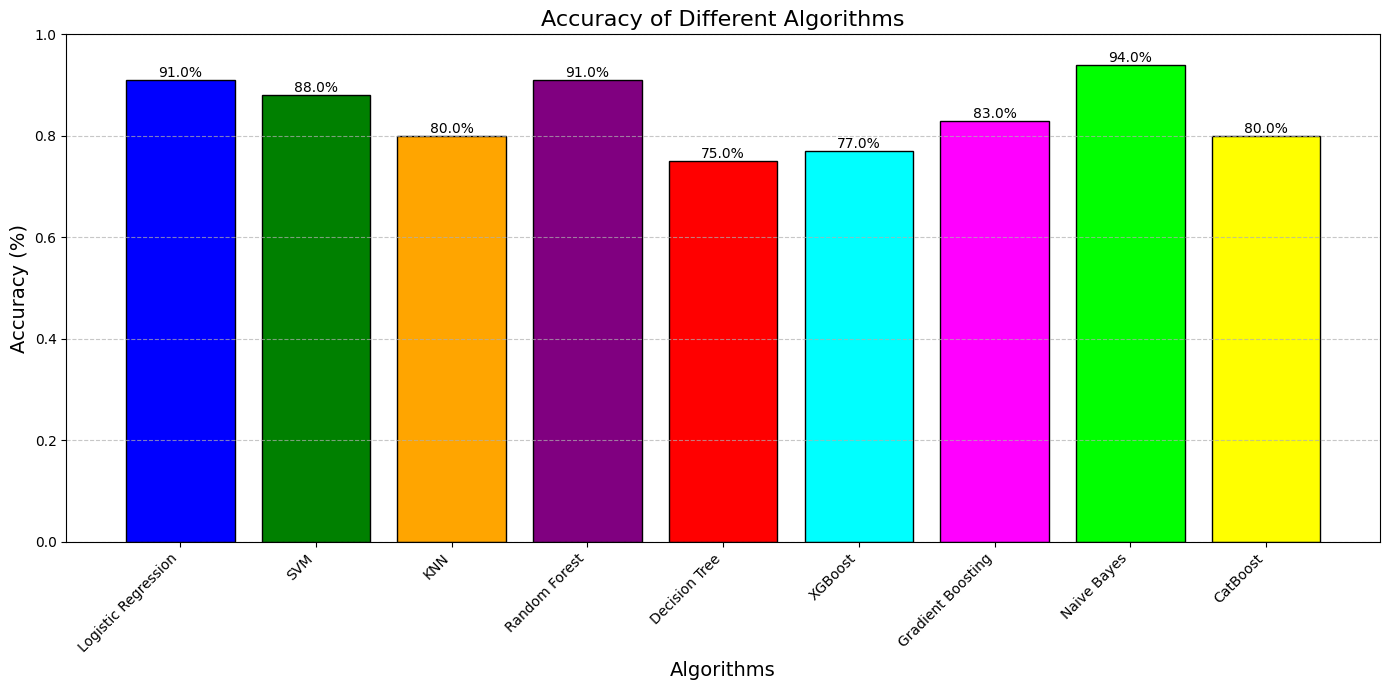

In [111]:
import matplotlib.pyplot as plt
import numpy as np


algorithms = [
    "Logistic Regression", "SVM", "KNN", 
    "Random Forest", "Decision Tree", 
    "XGBoost", "Gradient Boosting", 
     "Naive Bayes",  "CatBoost"
]
accuracies = [0.91, 0.88, 0.80, 0.91, 0.75, 0.77, 0.83, 0.94, 0.80]


colors = [
    'blue', 'green', 'orange', 'purple', 
    'red', 'cyan', 'magenta', 'lime', 
    'yellow'



    
]

plt.figure(figsize=(14, 7))
bars = plt.bar(algorithms, accuracies, color=colors, edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{acc*100:.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Accuracy of Different Algorithms", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1) 

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


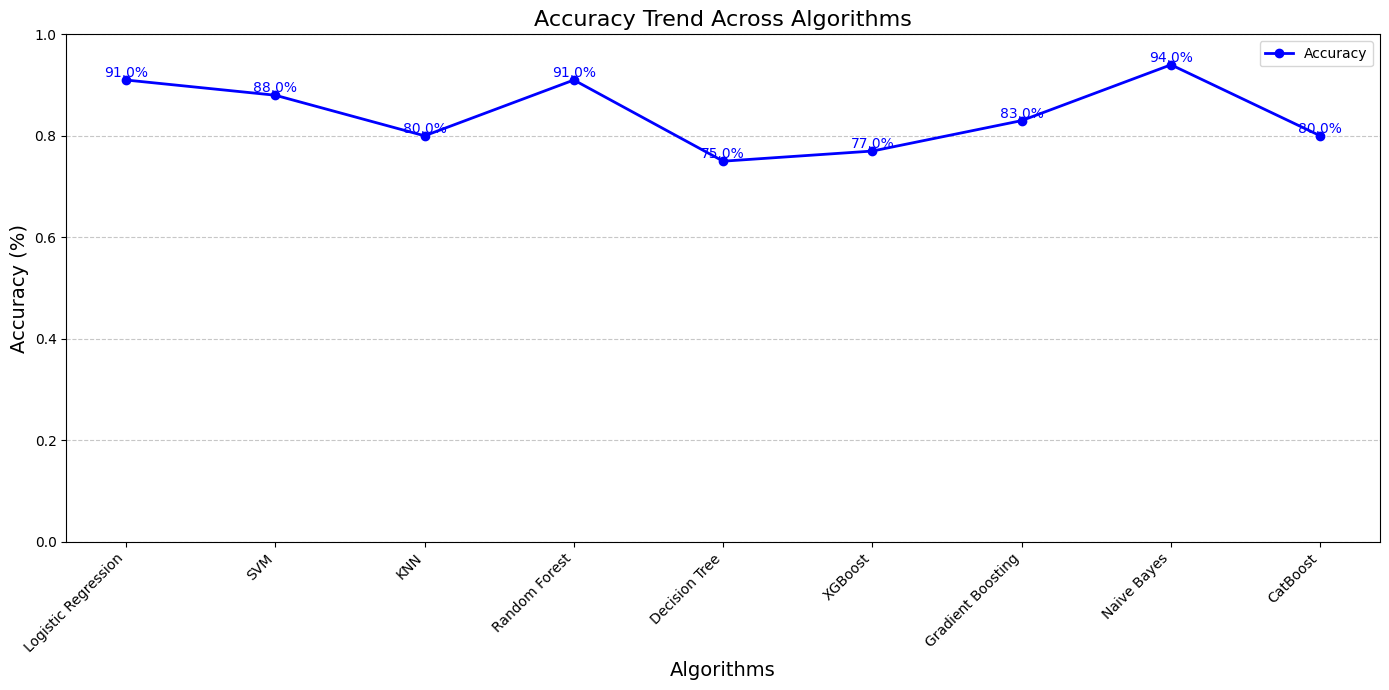

In [112]:
# Line plot तयार करा
plt.figure(figsize=(14, 7))
plt.plot(algorithms, accuracies, marker='o', color='b', label="Accuracy", linestyle='-', linewidth=2)

# प्रत्येक point वर percentage annotate करा
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc*100:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')

# Labels आणि Title जोडा
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Accuracy Trend Across Algorithms", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend आणि Plot दाखवा
plt.legend()
plt.tight_layout()
plt.show()


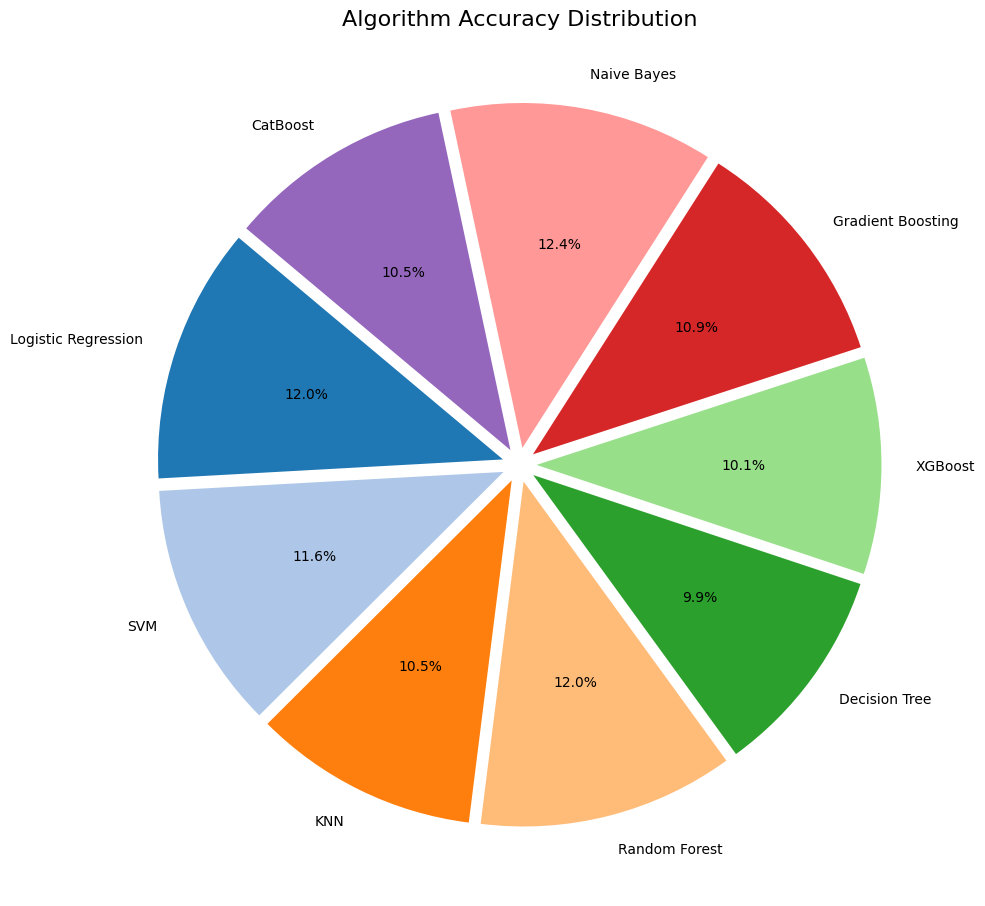

In [113]:
import matplotlib.pyplot as plt

algorithms = [
    "Logistic Regression", "SVM", "KNN", 
    "Random Forest", "Decision Tree", 
    "XGBoost", "Gradient Boosting", 
     "Naive Bayes",  "CatBoost"
]
accuracies = [0.91, 0.88, 0.80, 0.91, 0.75, 0.77, 0.83, 0.94, 0.80]



plt.figure(figsize=(10, 10))
explode = [0.05] * len(algorithms)  
plt.pie(
    accuracies, labels=algorithms, autopct='%1.1f%%', 
    startangle=140, explode=explode, colors=plt.cm.tab20.colors
)


plt.title("Algorithm Accuracy Distribution", fontsize=16)


plt.tight_layout()
plt.show()


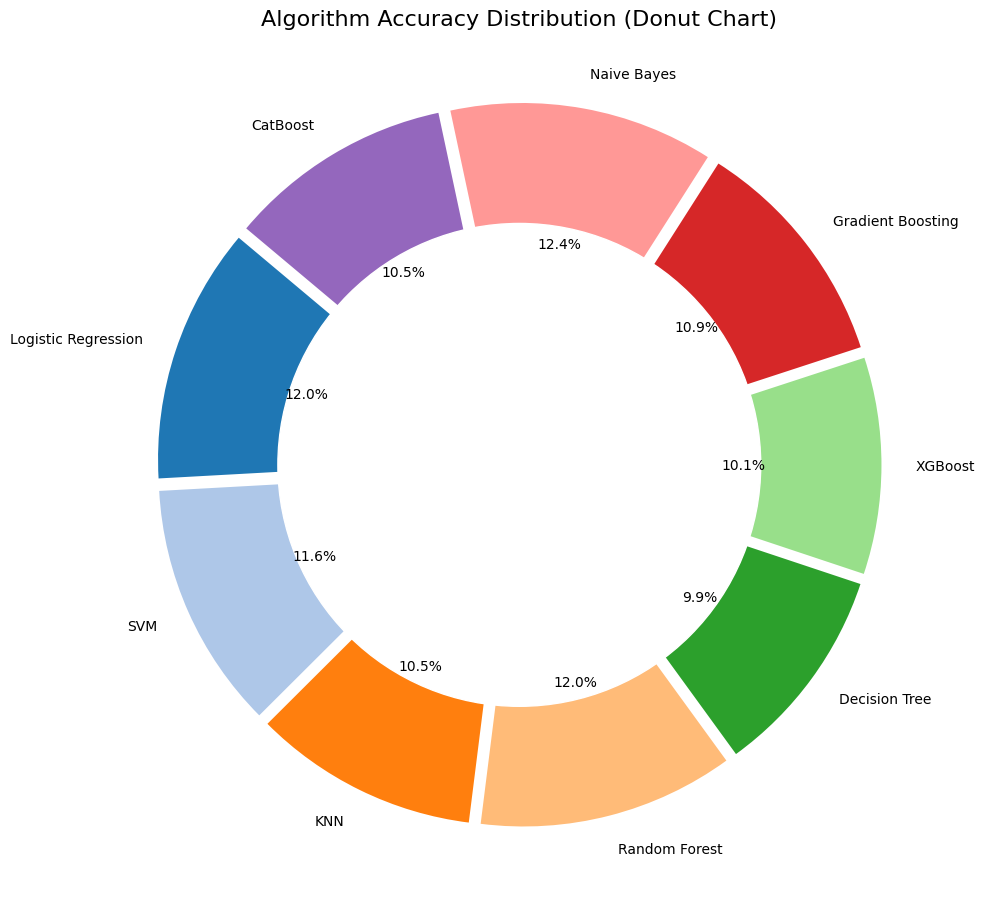

In [114]:
plt.figure(figsize=(10, 10))
explode = [0.05] * len(algorithms)

# Donut Chart
wedges, texts, autotexts = plt.pie(
    accuracies, labels=algorithms, autopct='%1.1f%%', 
    startangle=140, explode=explode, colors=plt.cm.tab20.colors
)
# Inner white circle for donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

plt.title("Algorithm Accuracy Distribution (Donut Chart)", fontsize=16)
plt.tight_layout()
plt.show()
